# **PROYEK ANALISIS DATA: BIKE SHARING DATASET**
- **Nama:** Risma Auliya Salsabilla
- **Email:** rismaauliyaa2124@gmail.com
- **ID Dicoding:** rismaauliya

## **Menentukan Pertanyaan Bisnis**
1.   Pada jam berapa peminjaman sepeda yang paling banyak dan paling sedikit?
2.   Pada bulan apa peminjaman sepeda yang paling banyak dan paling sedikit?
3.   Berapa banyak orang yang menjadi peminjam registered dibandingkan dengan casual?
4.   Total peminjaman sepeda lebih banyak pada tahun berapa?
5.   Bagaimana tren peminjaman sepeda dari tahun 2011 ke tahun 2012?
6.   Bagaimana tren peminjaman sepeda setiap bulan?
7.   Berapa persentase orang yang meminjam sepeda saat weekdays dan weekend?
8.   Pada musim apa peminjaman sepeda paling sedikit?


# **Import Semua Packages/Library yang Digunakan**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA WRANGLING**

## **Gathering Data**

**Memuat Tabel `hour_df`**

In [2]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/itsmaul/bangkit-progress/main/data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
*   Nama-nama kolom yang disingkat dan kurang jelas (`dteday`, `yr`, `mnth`, `hr`, `weekday`, `cnt`) membuat bingung pengguna dan harus diubah.
*   Beberapa isi kolom hanya angka (`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`) yang terlihat ambigu dan harus diubah.
*   Terdapat kolom yang seharusnya dihapus (`workingday`) karena tidak diperlukan.

**Memuat Tabel `day_df`**

In [3]:
day_df = pd.read_csv("https://raw.githubusercontent.com/itsmaul/bangkit-progress/main/data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


**Insight:**
*   Nama-nama kolom yang disingkat dan kurang jelas (`dteday`, `yr`, `mnth`, `weekday`, `cnt`) membuat bingung pengguna dan harus diubah.
*   Beberapa isi kolom hanya angka (`season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`) yang terlihat ambigu dan harus diubah.
*   Terdapat kolom yang seharusnya dihapus (`workingday`) karena tidak diperlukan.

## **Assessing Data**

**Membuat Function untuk:**
1.   Melihat Info Tabel
2.   Mengecek Missing Values
3.   Mengecek Duplicate Data
4.   Mencetak Parameter Statistika



In [4]:
def assessing_data(df):
    print(f"\n---TABLE INFO---\n")
    df.info()

    print(f"\n---MISSING VALUES---\n")
    print(df.isna().sum())

    print(f"\n---DUPLICATE DATA---\n")
    print(df.duplicated().sum())

    print(f"\n---STATISTICS PARAMETER---\n")
    print(df.describe())

**Menilai Data `hour_df`**

In [5]:
assessing_data(hour_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

---MISSING VALUES---

instant

**Insight:**
*   Tipe Data yang Tidak Sesuai pada `dteday`, `season`, `yr`, `month`, `holiday`, `weekday`, `workingday`, and `weathersit`
*   Tidak Ada Missing Values
*   Tidak Ada Data Duplikat

**Menilai Data `day_df`**

In [6]:
assessing_data(day_df)


---TABLE INFO---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

---MISSING VALUES---

instant       0
dteday        0
season        0
yr 

**Insight:**
*   Tipe Data yang Tidak Sesuai pada `dteday`, `season`, `yr`, `month`, `holiday`, `weekday`, `workingday`, and `weathersit`
*   Tidak Ada Missing Values
*   Tidak Ada Data Duplikat

## **Cleaning Data**

**Drop Kolom Tidak Terpakai**

In [7]:
hour_df.drop(['workingday'], axis = 1, inplace= True)
day_df.drop(['workingday'], axis = 1, inplace= True)

Kolom `workingday` tidak diperlukan karena akan menambah sebuah kolom baru bernama `days_category` untuk memisahkan antara weekday atau weekend.

**Mengubah Nama Kolom yang Sulit Terbaca**

In [8]:
hour_df.rename(columns={'dteday':'dates','yr':'years','mnth':'months','hr':'hours','weekday':'day_a_week','cnt':'total'}, inplace=True)

In [9]:
day_df.rename(columns={'dteday':'dates','yr':'years','mnth':'months','weekday':'day_a_week','cnt':'total'}, inplace=True)

Nama-nama kolom tersebut diubah agar lebih mudah dibaca oleh pengguna.

**Mengubah Isi Kolom yang Sulit Terbaca**

In [10]:
# Season
hour_df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)
day_df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)

# Year
hour_df['years'].replace({0: '2011', 1: '2012'}, inplace=True)
day_df['years'].replace({0: '2011', 1: '2012'}, inplace=True)

# Month
hour_df['months'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)
day_df['months'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}, inplace=True)

# Holiday
hour_df['holiday'].replace({0: 'Not', 1: 'Yes'}, inplace=True)
day_df['holiday'].replace({0: 'Not', 1: 'Yes'}, inplace=True)

# Day a Week
hour_df['day_a_week'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}, inplace=True)
day_df['day_a_week'].replace({0: 'Sun', 1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thur', 5: 'Fri', 6: 'Sat'}, inplace=True)

# Weather Situation
hour_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}, inplace=True)
day_df['weathersit'].replace({1: 'Clear', 2: 'Misty', 3: 'Light_Rain', 4: 'Heavy_Rain'}, inplace=True)

<ipython-input-10-338c393e50a2>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  hour_df['season'].replace({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'}, inplace=True)
<ipython-input-10-338c393e50a2>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[

Isi kolom diubah dari angka menjadi sebuah kata atau keterangan agar lebih mudah terbaca dan diidentifikasi oleh pengguna.

**Menambahkan Kolom `days_category`**

In [11]:
day_a_week = ["Sun", "Mon", "Tue", "Wed", "Thur", "Fri", "Sat"]

def get_days_category(day_a_week):
    if day_a_week in ["Sun", "Sat"]:
        return "Weekend"
    else:
        return "Weekday"

hour_df["days_category"] = hour_df["day_a_week"].apply(get_days_category)
day_df["days_category"] = day_df["day_a_week"].apply(get_days_category)

Penambahan kolom `days_category` digunakan untuk memisahkan antara weekday dan weekend agar lebih mudah dianalisis.

**Menambahkan Kolom `hum_category`**

In [12]:
def get_hum_category(hum):
    if hum < 0.45:
        return "Too Dry"
    elif hum >= 0.45 and hum < 0.65:
        return "Ideal"
    else:
        return "Too Moist"

hour_df["hum_category"] = hour_df["hum"].apply(get_hum_category)
day_df["hum_category"] = day_df["hum"].apply(get_hum_category)

Penambahan kolom `hum_category` digunakan untuk memisahkan tingkatan kelembapan yang ada agar lebih mudah dianalisis.

**Mengganti Tipe Data**

In [13]:
# object to datetime

hour_df['dates'] = pd.to_datetime(hour_df['dates'])
day_df['dates'] = pd.to_datetime(day_df['dates'])

In [14]:
# int to category

columns = ['season', 'months', 'years', 'holiday', 'day_a_week', 'weathersit', 'days_category', 'hum_category']

for column in columns:
    hour_df[column] = hour_df[column].astype("category")
    day_df[column] = day_df[column].astype("category")

Perubahan tipe data berguna untuk menghemat penyimpanan dan juga lebih disesuaikan dengan fungsinya.

**Pengecekan Kembali Semua Perubahan**

In [15]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        17379 non-null  int64         
 1   dates          17379 non-null  datetime64[ns]
 2   season         17379 non-null  category      
 3   years          17379 non-null  category      
 4   months         17379 non-null  category      
 5   hours          17379 non-null  int64         
 6   holiday        17379 non-null  category      
 7   day_a_week     17379 non-null  category      
 8   weathersit     17379 non-null  category      
 9   temp           17379 non-null  float64       
 10  atemp          17379 non-null  float64       
 11  hum            17379 non-null  float64       
 12  windspeed      17379 non-null  float64       
 13  casual         17379 non-null  int64         
 14  registered     17379 non-null  int64         
 15  total          1737

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   instant        731 non-null    int64         
 1   dates          731 non-null    datetime64[ns]
 2   season         731 non-null    category      
 3   years          731 non-null    category      
 4   months         731 non-null    category      
 5   holiday        731 non-null    category      
 6   day_a_week     731 non-null    category      
 7   weathersit     731 non-null    category      
 8   temp           731 non-null    float64       
 9   atemp          731 non-null    float64       
 10  hum            731 non-null    float64       
 11  windspeed      731 non-null    float64       
 12  casual         731 non-null    int64         
 13  registered     731 non-null    int64         
 14  total          731 non-null    int64         
 15  days_category  731 non-

**Insight:**
*   Penghapusan dilakukan untuk kolom `workingday` karena tidak diperlukan.
*   Nama-nama kolom yang disingkat dan kurang jelas (`dteday`, `yr`, `hr`, `mnth`, `weekday`, `cnt`) telah diubah.
*   Beberapa isi kolom hanya angka (`season`, `yr`, `mnth`, `holiday`, `weekday`, `weathersit`) telah diubah.
*   Perubahan tipe data (`dteday`, `season`, `yr`, `month`, `holiday`, `weekday`, `weathersit`) telah dilakukan untuk menghemat penyimpanan dan disesuaikan dengan fungsinya.
*   Penambahan kolom baru, yaitu `days_category` dan `hum_category`, untuk memperjelas dataset.

# **EXPLORATORY DATA ANALYSIS (EDA)**

## **Eksplorasi Data `hour_df`**

**Mengecek 10 Sample Data**

In [17]:
hour_df.sample(10)

,instant,dates,season,years,months,hours,holiday,day_a_week,weathersit,temp,atemp,hum,windspeed,casual,registered,total,days_category,hum_category
14491,14492,2012-09-01,Summer,2012,Sep,0,Not,Sat,Clear,0.74,0.6818,0.62,0.1045,22,146,168,Weekend,Ideal
5127,5128,2011-08-06,Summer,2011,Aug,13,Not,Sat,Misty,0.80,0.7727,0.59,0.3284,176,265,441,Weekend,Ideal
13736,13737,2012-07-31,Summer,2012,Jul,13,Not,Tue,Clear,0.80,0.7576,0.55,0.2836,69,219,288,Weekday,Ideal
715,716,2011-02-02,Winter,2011,Feb,4,Not,Wed,Light_Rain,0.22,0.2121,0.93,0.2836,0,1,1,Weekday,Too Moist
10275,10276,2012-03-09,Winter,2012,Mar,5,Not,Fri,Light_Rain,0.40,0.4091,0.66,0.2836,2,27,29,Weekday,Too Moist
9031,9032,2012-01-17,Winter,2012,Jan,5,Not,Tue,Light_Rain,0.32,0.3030,0.66,0.3284,0,13,13,Weekday,Too Moist
1579,1580,2011-03-11,Winter,2011,Mar,7,Not,Fri,Clear,0.26,0.2576,0.70,0.1940,10,104,114,Weekday,Too Moist
14896,14897,2012-09-17,Summer,2012,Sep,21,Not,Mon,Light_Rain,0.62,0.5758,0.83,0.2239,28,205,233,Weekday,Too Moist
12055,12056,2012-05-22,Spring,2012,May,12,Not,Tue,Misty,0.62,0.5909,0.78,0.1045,76,178,254,Weekday,Too Moist
11896,11897,2012-05-15,Spring,2012,May,21,Not,Tue,Light_Rain,0.64,0.6061,0.73,0.2836,11,98,109,Weekday,Too Moist


**Mencetak Parameter Statistika**

In [18]:
hour_df.describe(include='all')

,instant,dates,season,years,months,hours,holiday,day_a_week,weathersit,temp,atemp,hum,windspeed,casual,registered,total,days_category,hum_category
count,17379.0000,17379,17379,17379,17379,17379.000000,17379,17379,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379
unique,NaN,NaN,4,2,12,NaN,2,7,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Summer,2012,Jul,NaN,Not,Sat,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Too Moist
freq,NaN,NaN,4496,8734,1488,NaN,16879,2512,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12365,8356
mean,8690.0000,2012-01-02 04:08:34.552045568,NaN,NaN,NaN,11.546752,NaN,NaN,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,NaN,NaN
min,1.0000,2011-01-01 00:00:00,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN
25%,4345.5000,2011-07-04 00:00:00,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,NaN,NaN
50%,8690.0000,2012-01-02 00:00:00,NaN,NaN,NaN,12.000000,NaN,NaN,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,NaN,NaN
75%,13034.5000,2012-07-02 00:00:00,NaN,NaN,NaN,18.000000,NaN,NaN,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,NaN,NaN
max,17379.0000,2012-12-31 00:00:00,NaN,NaN,NaN,23.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,NaN,NaN


Jumlah data dari hour_df adalah 17.379.

**Mengecek Kolom Unik**

In [19]:
hour_df.instant.is_unique

True

Berdasarkan hasil kode di atas, `instant` merupakan kolom unik yang berarti setiap baris akan memiliki nilai instant yang berbeda.

**Explore by `hour` with `total`**

Total Peminjaman Sepeda Berdasarkan Jam

In [20]:
hour_df.groupby(by="hours").agg({
    "total": ["sum"]
})

,total
,sum
hours,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


Berdasarkan hasil eksplorasi data di atas, total peminjaman sepeda paling banyak terjadi pada pukul 17:00 dan paling sedikit pada pukul 4:00.

**Explore by `month` with `total`**

Total Peminjaman Sepeda Berdasarkan Bulan

In [21]:
# Ubah kolom months sesuai dengan urutan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_df['months'] = pd.Categorical(hour_df['months'], categories=month_order, ordered=True)

hour_df.groupby(by="months").agg({
    "total": ["sum"]
})

<ipython-input-21-cefd4387294c>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="months").agg({


,total
,sum
months,
Jan,134933
Feb,151352
Mar,228920
Apr,269094
May,331686
Jun,346342
Jul,344948
Aug,351194


Berdasarkan hasil eksplorasi data di atas, total peminjaman sepeda paling banyak terjadi pada bulan Agustus dengan jumlah 351.194 dan paling sedikit pada bulan Januari dengan jumlah 134.933.

**Explore by `year` with `casual` and `registered`**

Total Peminjaman Sepeda per Tahun Berdasarkan Peminjam Casual dan Registered

In [22]:
hour_df.groupby(by="years").agg({
    "instant": "nunique",
    "casual": ["sum"],
    "registered": ["sum"]
})

<ipython-input-22-c0e6a1750ad4>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_df.groupby(by="years").agg({


,instant,casual,registered
,nunique,sum,sum
years,,,
2011,8645,247252,995851
2012,8734,372765,1676811


Berdasarkan hasil eksplorasi data di atas, peminjam casual di tahun 2011 dan 2012 memiliki jumlah yang lebih sedikit dibandingkan peminjam registered. Terdapat juga kenaikan jumlah peminjam sepeda di tahun 2012, baik peminjam casual maupun registered, dibandingkan dengan tahun sebelumnya. Hal tersebut menunjukkan bahwa minat seseorang akan mengalami peningkatan.

**Insight:**
*   Eksplorasi data total peminjaman berdasarkan jam.
*   Eksplorasi data total peminjaman berdasarkan bulan.
*   Eksplorasi data total peminjaman berdasarkan tahun dengan kategori peminjam casual dan registered.



## **Eksplorasi Data `day_df`**

**Mengecek 10 Sample Data**

In [23]:
day_df.sample(10)

,instant,dates,season,years,months,holiday,day_a_week,weathersit,temp,atemp,hum,windspeed,casual,registered,total,days_category,hum_category
275,276,2011-10-03,Fall,2011,Oct,Not,Mon,Misty,0.384167,0.392046,0.760833,0.083346,330,3240,3570,Weekday,Too Moist
207,208,2011-07-27,Summer,2011,Jul,Not,Wed,Clear,0.775000,0.690667,0.402917,0.183463,755,3901,4656,Weekday,Too Dry
50,51,2011-02-20,Winter,2011,Feb,Not,Sun,Clear,0.285217,0.277330,0.407826,0.223235,639,1173,1812,Weekend,Too Dry
288,289,2011-10-16,Fall,2011,Oct,Not,Sun,Clear,0.511667,0.503154,0.486667,0.281717,1748,3293,5041,Weekend,Ideal
267,268,2011-09-25,Fall,2011,Sep,Not,Sun,Misty,0.634167,0.572637,0.845000,0.050379,1544,3466,5010,Weekend,Too Moist
316,317,2011-11-13,Fall,2011,Nov,Not,Sun,Clear,0.440833,0.430550,0.458333,0.281721,1004,2713,3717,Weekend,Ideal
200,201,2011-07-20,Summer,2011,Jul,Not,Wed,Clear,0.768333,0.746850,0.707083,0.113817,644,3688,4332,Weekday,Too Moist
176,177,2011-06-26,Summer,2011,Jun,Not,Sun,Clear,0.680000,0.637629,0.513333,0.094533,1920,3385,5305,Weekend,Ideal
239,240,2011-08-28,Summer,2011,Aug,Not,Sun,Clear,0.707059,0.647959,0.561765,0.304659,1415,2919,4334,Weekend,Ideal
495,496,2012-05-10,Spring,2012,May,Not,Thur,Clear,0.505833,0.491783,0.552083,0.314063,1026,5546,6572,Weekday,Ideal


**Mencetak Parameter Statistika**

In [24]:
day_df.describe(include='all')

,instant,dates,season,years,months,holiday,day_a_week,weathersit,temp,atemp,hum,windspeed,casual,registered,total,days_category,hum_category
count,731.000000,731,731,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731
unique,NaN,NaN,4,2,12,2,7,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,3
top,NaN,NaN,Summer,2012,Aug,Not,Mon,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Weekday,Ideal
freq,NaN,NaN,188,366,62,710,105,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,334
mean,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN,NaN
min,1.000000,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN,NaN
25%,183.500000,2011-07-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN,NaN
50%,366.000000,2012-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN,NaN
75%,548.500000,2012-07-01 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN,NaN
max,731.000000,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN,NaN


Jumlah data dari day_df adalah 731.

**Mengecek Kolom Unik**

In [25]:
day_df.instant.is_unique

True

Berdasarkan hasil kode di atas, `instant` merupakan kolom unik yang berarti setiap baris akan memiliki nilai instant yang berbeda.

**Explore by `season`**

Peminjaman Sepeda Berdasarkan Musim

In [26]:
day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)

<ipython-input-26-cafc6460ff6d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="season").instant.nunique().sort_values(ascending=False)


,instant
season,
Summer,188
Spring,184
Winter,181
Fall,178


Berdasarkan hasil eksplorasi data di atas, peminjaman sepeda paling banyak terjadi pada musim panas (summer).

**Explore by `years` with `total`**

Total Peminjaman Sepeda Berdasarkan Tahun

In [27]:
day_df.groupby(by="years").agg({
    "instant": "nunique",
    "total": ["sum"]
})

<ipython-input-27-08e77d10e93a>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="years").agg({


,instant,total
,nunique,sum
years,,
2011,365,1243103
2012,366,2049576


Berdasarkan hasil eksplorasi data di atas, total peminjaman sepeda pada tahun 2011 lebih sedikit dibandingkan tahun 2012. Total peminjaman sepeda pada tahun 2011 adalah 1.243.103 dan tahun 2012 adalah 2.049.576.

**Explore by `days_category` with `total`**

Total Peminjaman Sepeda Berdasarkan Hari Kerja dan Hari Libur

In [28]:
day_df.groupby(by="days_category").agg({
    "instant": "nunique",
    "total": ["sum"]
})

<ipython-input-28-83e980e278b1>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_df.groupby(by="days_category").agg({


,instant,total
,nunique,sum
days_category,,
Weekday,521,2370845
Weekend,210,921834


Berdasarkan hasil eksplorasi data di atas, total peminjaman sepeda lebih banyak dilakukan ketika hari kerja dengan jumlah 2.370.845 dibandingkan hari libur dengan jumlah 921.834.

**Insight:**
*   Eksplorasi data peminjaman sepeda berdasarkan musim.
*   Eksplorasi data total peminjaman sepeda berdasarkan tahun.
*   Eksplorasi data total peminjaman sepeda berdasarkan hari kerja dan hari libur.

# **DATA VISUALIZATION & EXPLANATORY ANALYSIS**

## **Pada jam berapa peminjaman sepeda yang paling banyak dan paling sedikit?**

<ipython-input-29-0f83e869370b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hours", y="total", data=sum_hour_df, palette=["#D3D3D3"]*17 + ["#90CAF9"] + ["#D3D3D3"]*6, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_bas

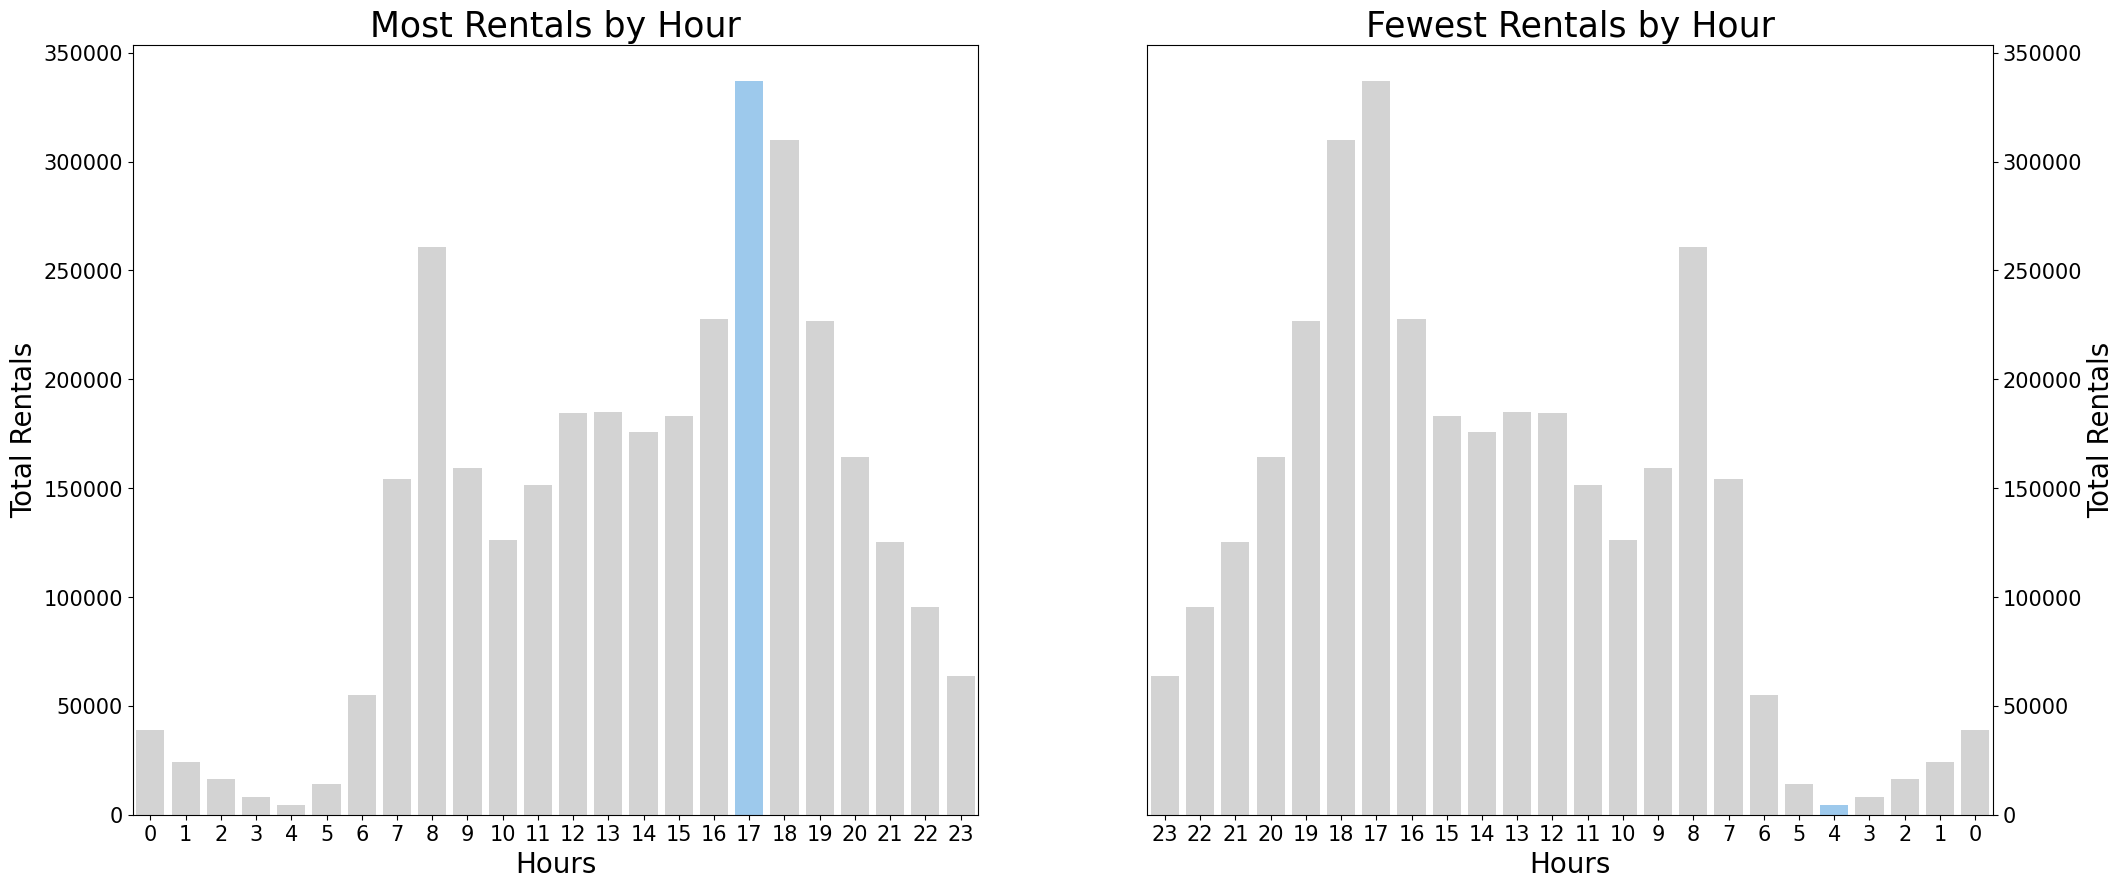

In [29]:
# Gabungan hours dan total
sum_hour_df = hour_df.groupby("hours").total.sum().reset_index()

# Bar chart untuk melihat perbedaan peminjaman sepeda berdasarkan jam
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Bar plot untuk peminjam sepeda terbanyak
sns.barplot(x="hours", y="total", data=sum_hour_df, palette=["#D3D3D3"]*17 + ["#90CAF9"] + ["#D3D3D3"]*6, ax=ax[0])

# Atur label dan judul untuk subplot pertama
ax[0].set_ylabel("Total Rentals", fontsize=20)
ax[0].set_xlabel("Hours", fontsize=20)
ax[0].set_title("Most Rentals by Hour", fontsize=25)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

# Bar plot untuk peminjam sepeda tersedikit
sns.barplot(x="hours", y="total", data=sum_hour_df.sort_values(by="hours", ascending=True), palette=["#D3D3D3"]*4 + ["#90CAF9"] + ["#D3D3D3"]*19, ax=ax[1])

# Atur label dan judul untuk subplot kedua
ax[1].set_ylabel("Total Rentals", fontsize=20)
ax[1].set_xlabel("Hours", fontsize=20)
ax[1].set_title("Fewest Rentals by Hour", fontsize=25)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# Tampilan
plt.show()

Berdasarkan visualisasi bar chart, peminjam paling banyak terdapat pada pukul 17:00 dan peminjam paling sedikit pada pukul 4:00. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas.

## **Pada bulan apa peminjaman sepeda yang paling banyak dan paling sedikit?**

<ipython-input-30-00b3adaf8e89>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sum_month_df = hour_df.groupby("months").total.sum().reset_index()
<ipython-input-30-00b3adaf8e89>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="months", y="total", data=sum_month_df, palette=["#D3D3D3"]*7 + ["#90CAF9"] + ["#D3D3D3"]*4, ax=ax[0])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/p

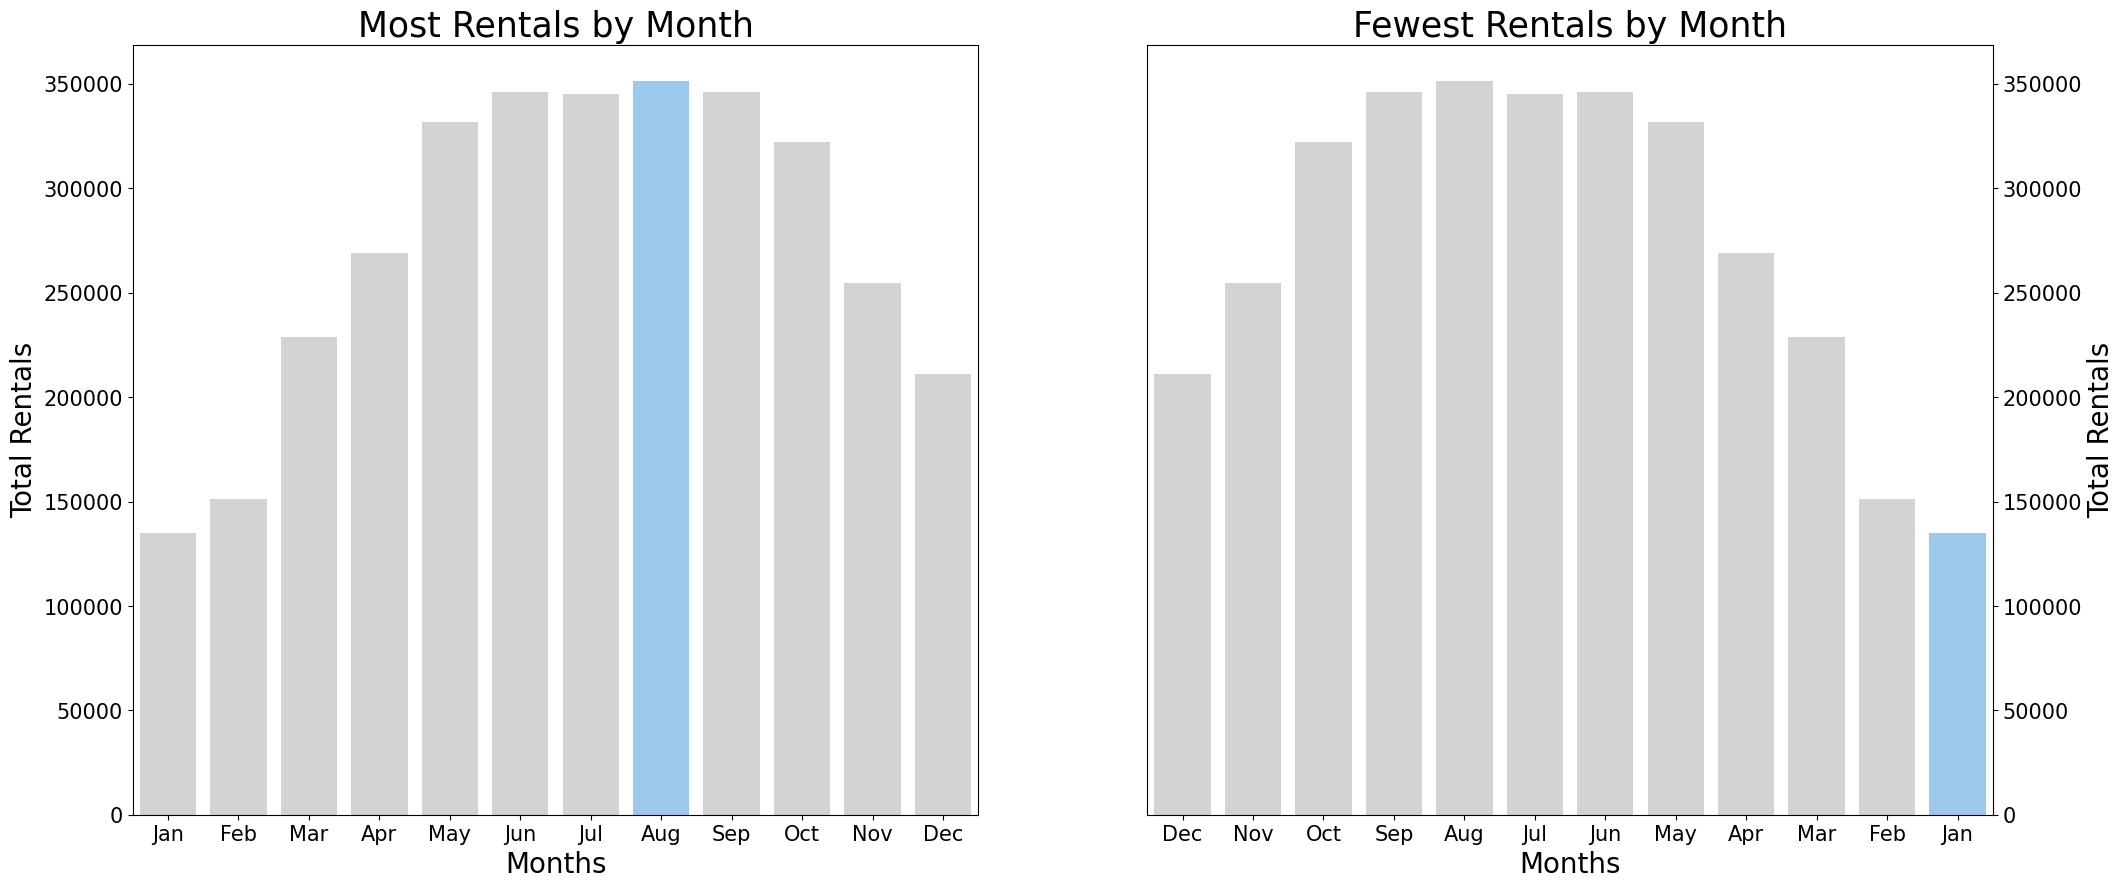

In [30]:
# Ubah kolom months sesuai dengan urutan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
hour_df['months'] = pd.Categorical(hour_df['months'], categories=month_order, ordered=True)

# Gabungan months dan total
sum_month_df = hour_df.groupby("months").total.sum().reset_index()

# Bar chart untuk melihat perbedaan peminjaman sepeda berdasarkan bulan
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 10))

# Bar plot untuk peminjam sepeda terbanyak
sns.barplot(x="months", y="total", data=sum_month_df, palette=["#D3D3D3"]*7 + ["#90CAF9"] + ["#D3D3D3"]*4, ax=ax[0])

# Atur label dan judul untuk subplot pertama
ax[0].set_ylabel("Total Rentals", fontsize=20)
ax[0].set_xlabel("Months", fontsize=20)
ax[0].set_title("Most Rentals by Month", fontsize=25)
ax[0].tick_params(axis='y', labelsize=15)
ax[0].tick_params(axis='x', labelsize=15)

# Bar plot untuk peminjam sepeda tersedikit
sns.barplot(x="months", y="total", data=sum_month_df.sort_values(by="months", ascending=True), palette=["#90CAF9"] + ["#D3D3D3"]*11, ax=ax[1])

# Atur label dan judul untuk subplot kedua
ax[1].set_ylabel("Total Rentals", fontsize=20)
ax[1].set_xlabel("Months", fontsize=20)
ax[1].set_title("Fewest Rentals by Month", fontsize=25)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=15)
ax[1].tick_params(axis='x', labelsize=15)

# Tampilan
plt.show()

Berdasarkan visualisasi bar chart, peminjam paling banyak terdapat pada bulan Agustus dan peminjam paling sedikit pada bulan Januari. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas.

## **Berapa banyak orang yang menjadi peminjam registered dibandingkan dengan casual?**

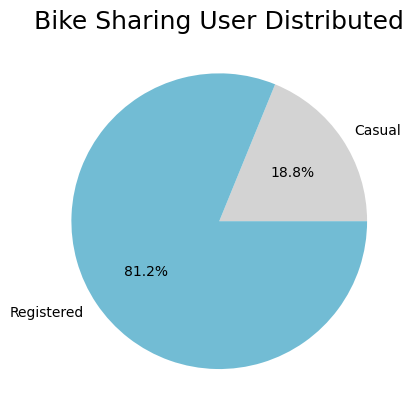

<ipython-input-31-b51ad31f510e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=data, palette=["#D3D3D3", "#72BCD4"])
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


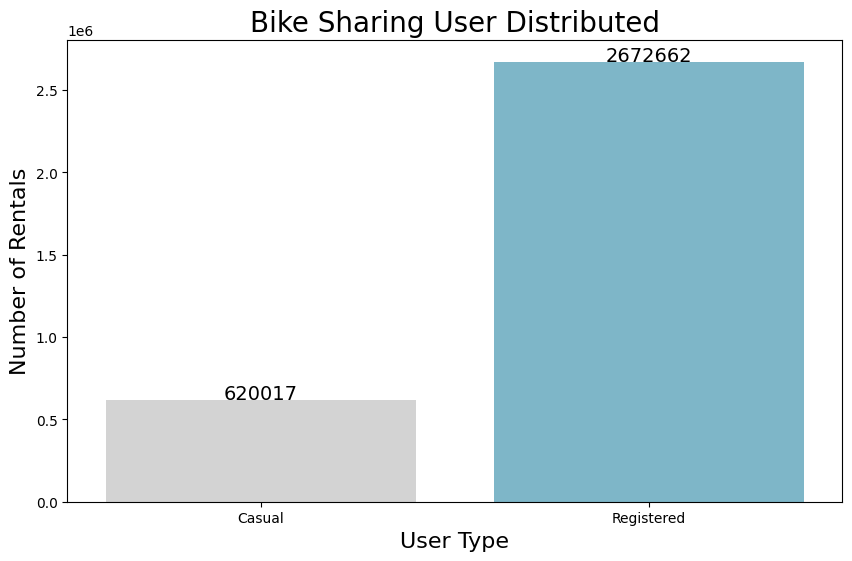

In [31]:
# Total
total_registered = sum(hour_df['registered'])
total_casual = sum(hour_df['casual'])

# Data yang digunakan
data = [total_casual, total_registered]
labels = ['Casual', 'Registered']

# Pie chart
plt.title("Bike Sharing User Distributed", fontsize=18)
plt.pie(data, labels=labels, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
plt.show()

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=labels, y=data, palette=["#D3D3D3", "#72BCD4"])
ax.set_title("Bike Sharing User Distributed", fontsize=20, loc="center")
ax.set_xlabel("User Type", fontsize=16)
ax.set_ylabel("Number of Rentals", fontsize=16)

for i, v in enumerate(data): # Tambah nilai di atas setiap bar
    ax.text(i, v + 500, f'{v:.0f}', ha='center', fontsize=14)

plt.show()

Berdasarkan visualisasi pie dan bar chart, peminjam registered memiliki persentase 81,2% dengan jumlah sebanyak 2.672.662, sedangkan peminjam casual memiliki persentase 18,8% dengan jumlah sebanyak 620.017. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas.

## **Total peminjaman sepeda lebih banyak pada tahun berapa?**

<ipython-input-32-13488e716f95>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_year = day_df.groupby('years')['total'].sum()


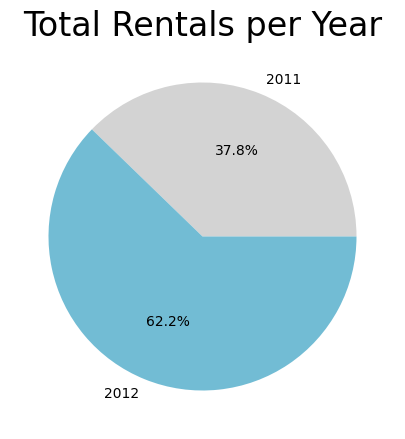

<ipython-input-32-13488e716f95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="years", y="total", data=day_df.sort_values(by="years", ascending=True), palette=["#D3D3D3", "#72BCD4"], ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


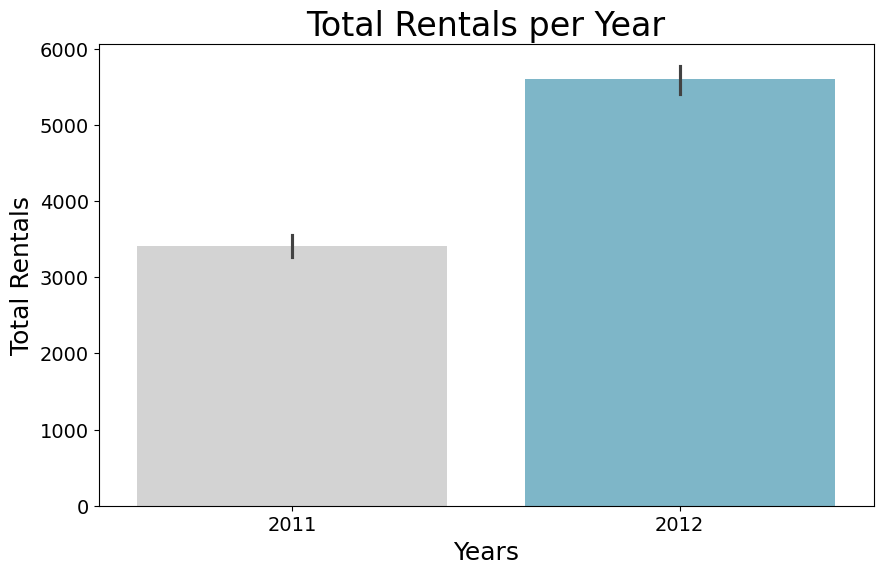

In [32]:
# Total
total_per_year = day_df.groupby('years')['total'].sum()

# Pie chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(total_per_year, labels=total_per_year.index, autopct='%1.1f%%', colors=["#D3D3D3", "#72BCD4"])
ax.set_title("Total Rentals per Year", fontsize=24)
plt.show()

# Bar chart
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="years", y="total", data=day_df.sort_values(by="years", ascending=True), palette=["#D3D3D3", "#72BCD4"], ax=ax)
ax.set_title("Total Rentals per Year", loc="center", fontsize=24)
ax.set_ylabel("Total Rentals", fontsize=18)
ax.set_xlabel("Years", fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()

Berdasarkan visualisasi pie dan bar chart, peminjaman pada tahun 2011 memiliki persentase 37,8% dengan jumlah yang terdapat pada rentang 5000-6000, sedangkan peminjaman pada tahun 2012 memiliki persentase 62,2% dengan jumlah yang terdapat pada rentang 3000-4000. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas. Jadi, total peminjaman sepeda lebih banyak terjadi pada tahun 2012.

## **Bagaimana tren peminjaman sepeda dari tahun 2011 ke tahun 2012?**

<ipython-input-33-4e8cfdf5e1da>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_year = day_df.groupby('years')['total'].sum()


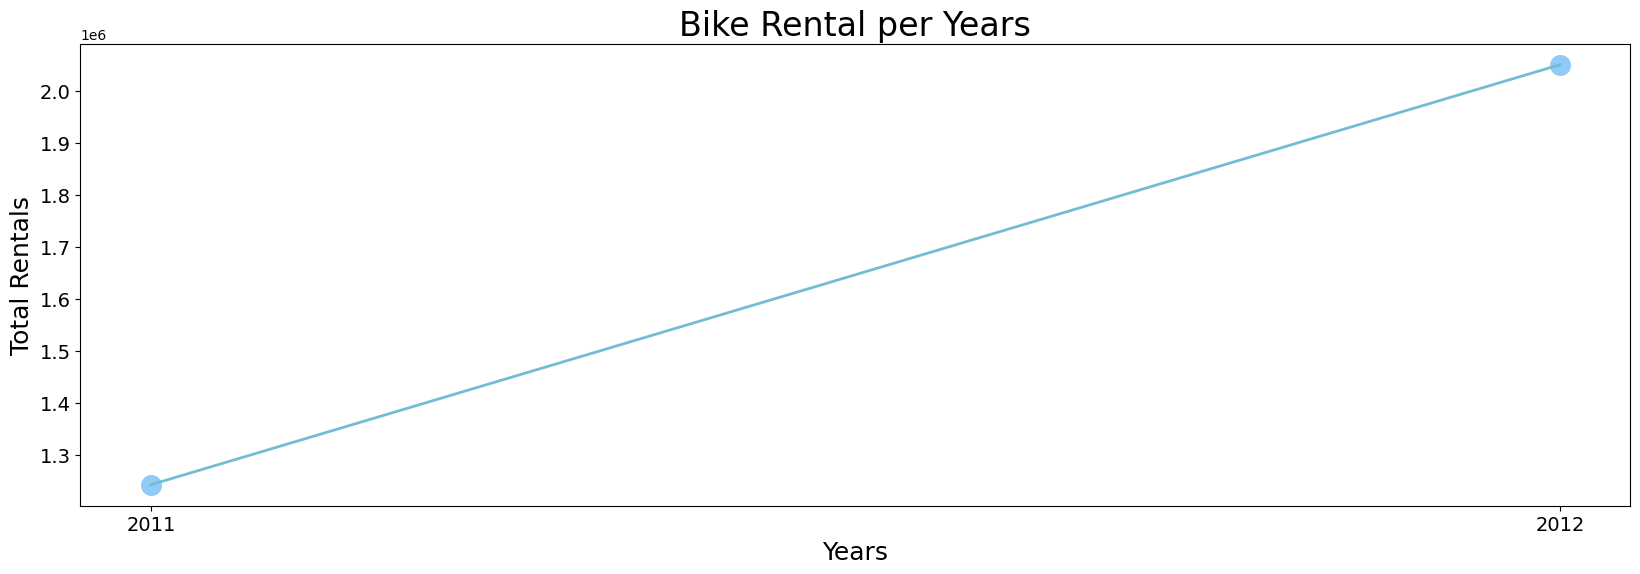

In [33]:
# Total
total_per_year = day_df.groupby('years')['total'].sum()

# Scatter chart
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(total_per_year.index, total_per_year.values, c="#90CAF9", s=200, marker='o')
ax.plot(total_per_year.index, total_per_year.values, color="#72BCD4", linewidth=2)
ax.set_title('Bike Rental per Years', fontsize=24, loc='center')
ax.set_ylabel('Total Rentals', fontsize=18)
ax.set_xlabel('Years', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()

Berdasarkan visualisasi scatter chart, tren peminjaman sepeda dari tahun 2011 ke 2012 mengalami peningkatan.

## **Bagaimana tren peminjaman sepeda setiap bulan?**

<ipython-input-34-9c6fc4e6bb6e>:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_per_month = day_df.groupby('months')['total'].sum()


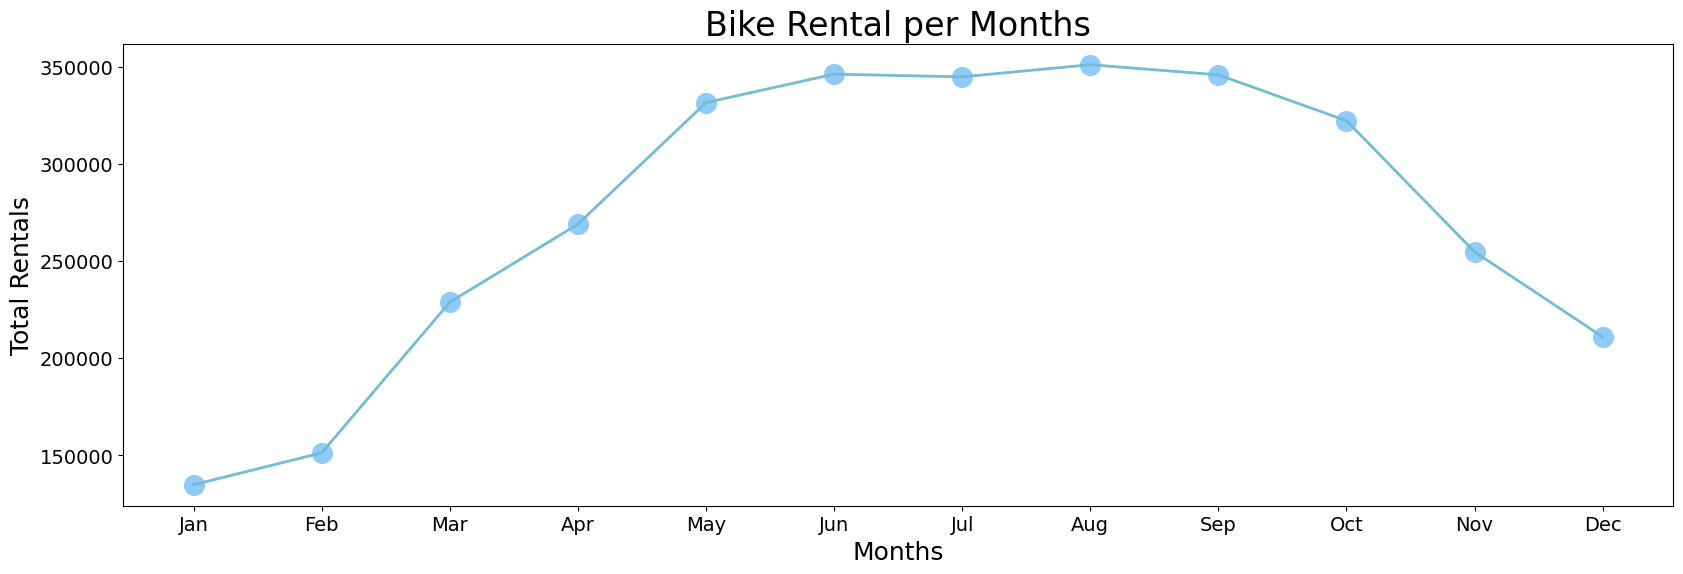

In [34]:
# Ubah kolom months sesuai dengan urutan
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
day_df['months'] = pd.Categorical(day_df['months'], categories=month_order, ordered=True)

# Total
total_per_month = day_df.groupby('months')['total'].sum()

# Scatter chart
fig, ax = plt.subplots(figsize=(20, 6))
ax.scatter(total_per_month.index, total_per_month.values, c="#90CAF9", s=200, marker='o')
ax.plot(total_per_month.index, total_per_month.values, color="#72BCD4", linewidth=2)
ax.set_title('Bike Rental per Months', fontsize=24, loc='center')
ax.set_ylabel('Total Rentals', fontsize=18)
ax.set_xlabel('Months', fontsize=18)
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
plt.show()

Berdasarkan visualisasi scatter chart, tren peminjaman setiap bulan mengalami peningkatan bertahap dari Januari-Juni. Lalu, mengalami penurunan dan peningkatan secara stabil dari Juni-September dan mengalami penurunan bertahap dari September-Desember.

## **Berapa persentase orang yang meminjam sepeda saat weekdays dan weekend?**

<ipython-input-35-daf92c34aa03>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_total = day_df.groupby('days_category')['total'].sum()


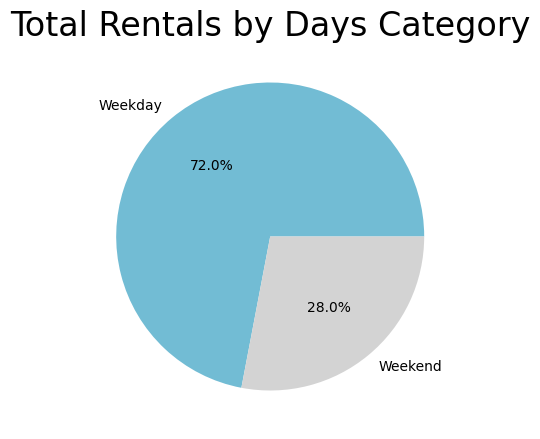

<ipython-input-35-daf92c34aa03>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="days_category", y="total", data=day_df.sort_values(by="days_category", ascending=True), palette=["#72BCD4", "#D3D3D3"], ax=ax)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


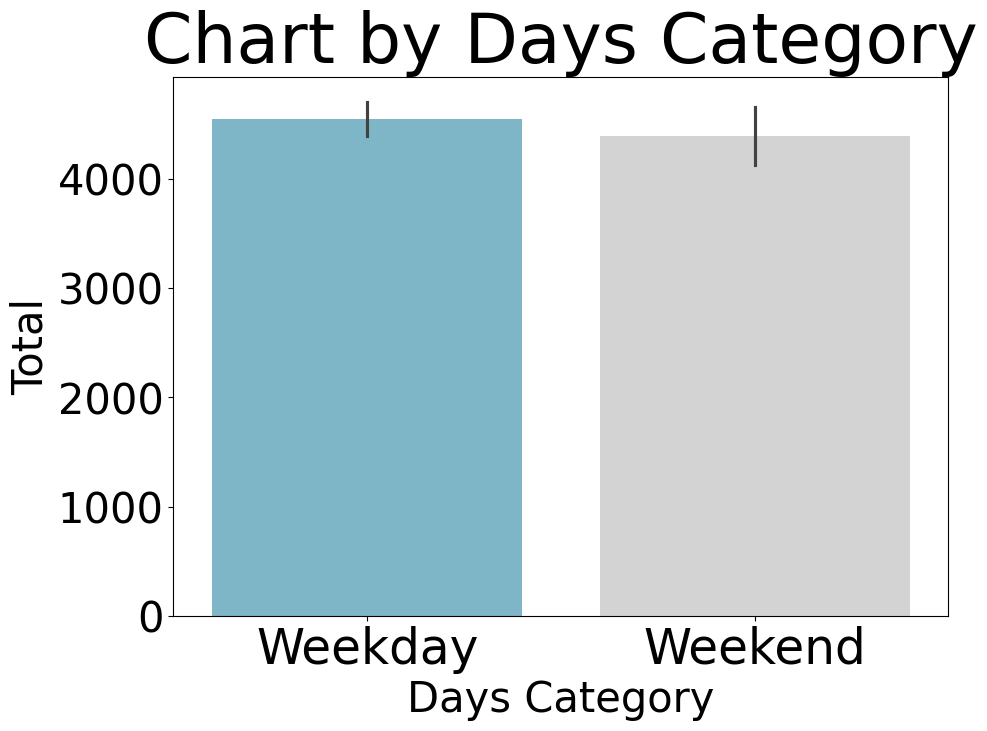

In [35]:
# Total
category_total = day_df.groupby('days_category')['total'].sum()

# Pie chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(category_total, labels=category_total.index, autopct='%1.1f%%', colors=["#72BCD4", "#D3D3D3"])
ax.set_title("Total Rentals by Days Category", fontsize=24)
plt.show()

# Bar chart
fig, ax = plt.subplots(figsize=(10, 7))
sns.barplot(x="days_category", y="total", data=day_df.sort_values(by="days_category", ascending=True), palette=["#72BCD4", "#D3D3D3"], ax=ax)
ax.set_title("Chart by Days Category", loc="center", fontsize=50)
ax.set_ylabel("Total", fontsize=30)
ax.set_xlabel("Days Category", fontsize=30)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
plt.show()

Berdasarkan visualisasi pie dan bar chart, peminjaman pada hari kerja memiliki persentase 72%, sedangkan peminjaman pada hari libur memiliki persentase 28. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas. Jadi, total peminjaman sepeda lebih banyak terjadi pada hari kerja (weekday).

## **Pada musim apa peminjaman sepeda paling sedikit?**

<ipython-input-36-0178194f4328>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_total = day_df.groupby('season')['total'].sum()


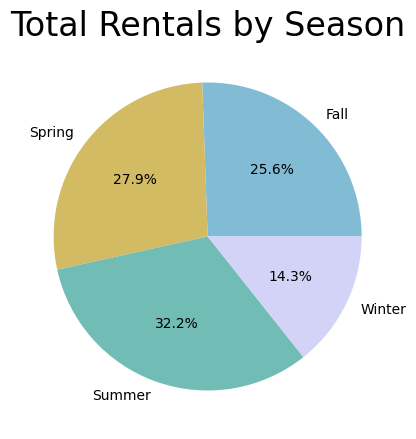

<ipython-input-36-0178194f4328>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tup

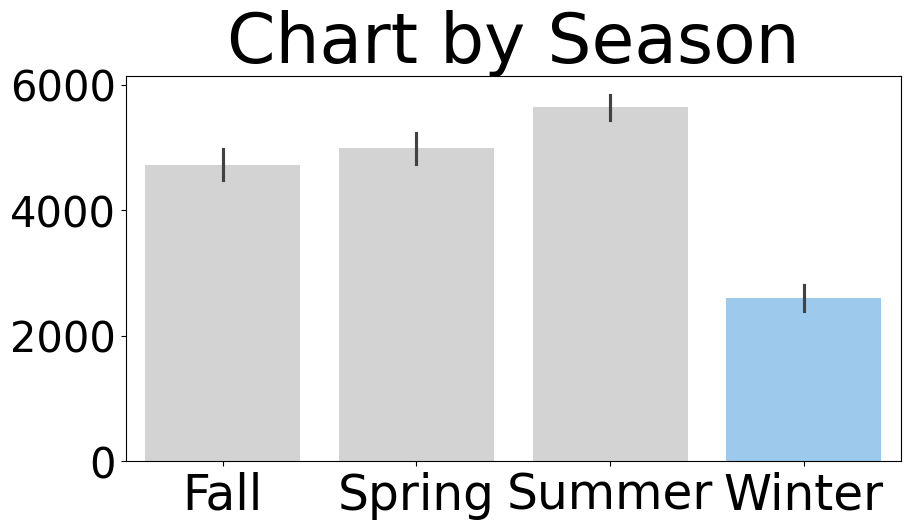

In [36]:
# Total
season_total = day_df.groupby('season')['total'].sum()

# Pie chart
fig, ax = plt.subplots(figsize=(10, 5))
ax.pie(season_total, labels=season_total.index, autopct='%1.1f%%', colors=["#82BCD4", "#D3BB63", "#72BCB6", "#D3D3F7"])
ax.set_title("Total Rentals by Season", fontsize=24)
plt.show()

# Bar chart
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(
        y="total",
        x="season",
        data=day_df.sort_values(by="season", ascending=False),
        palette=["#D3D3D3", "#D3D3D3", "#D3D3D3", "#90CAF9"],
        ax=ax
    )
ax.set_title("Chart by Season", loc="center", fontsize=50)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.tick_params(axis='x', labelsize=35)
ax.tick_params(axis='y', labelsize=30)
plt.show()

Berdasarkan visualisasi pie dan bar chart, peminjaman pada musim gugur memiliki persentase 25,6%, musim semi memiliki persentase 27,9%, musim panas memiliki persentase 32,2%, dan musim dingin memiliki persentase 14,3%. Hal tersebut juga ditandai dengan perbedaan warna bar agar terlihat lebih jelas. Jadi, total peminjaman sepeda paling sedikit terjadi pada musim dingin.

**Insight:**
1.  Data dari `hour_df`
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan jam.
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan bulan.
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan peminjam casual dan registered.
2.  Data dari `day_df`
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan tahun.
  *   Visualiasasi data menggunakan scatter chart untuk tren peminjaman sepeda setiap tahun.
  *   Visualiasasi data menggunakan scatter chart untuk tren peminjaman sepeda setiap bulan.
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan kategori hari, yaitu hari kerja dan hari libur.
  *   Visualiasasi data menggunakan pie dan bar chart untuk peminjaman sepeda berdasarkan musim.

# **ANALISIS LANJUTAN**

## **RFM Analysis**

**`Recency:`**

Parameter yang digunakan untuk melihat kapan terakhir peminjam registered meminjam sepeda.

---

**`Frequency:`**

Parameter ini digunakan untuk mengidentifikasi seberapa sering peminjam registered meminjam sepeda.

---

**`Monetary:`**

Parameter ini digunakan untuk mengidentifikasi seberapa besar jumlah peminjam yang berasal dari peminjam registered.

**Buat DataFrame Baru**

In [37]:
rfm_df = hour_df.groupby(by="registered", as_index=False).agg({
    "dates": "max",          # Tanggal terakhir peminjaman
    "instant": "nunique",    # Jumlah peminjaman
    "total": "sum"           # Total peminjam yang dihasilkan
})
rfm_df.columns = ["instant", "max_order", "frequency", "monetary"]

# Menghitung kapan terakhir peminjam melakukan peminjaman (hari)
rfm_df["max_order"] = rfm_df["max_order"].dt.date
recent_date = hour_df["dates"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order"].apply(lambda x: (recent_date - x).days)
rfm_df.drop("max_order", axis=1, inplace=True)
rfm_df.head()

,instant,frequency,monetary,recency
0,0,24,35,38
1,1,201,294,0
2,2,245,648,1
3,3,294,1154,0
4,4,307,1602,3


**Identifikasi Peminjam Terbaik**

<ipython-input-38-963b413828ad>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tupl

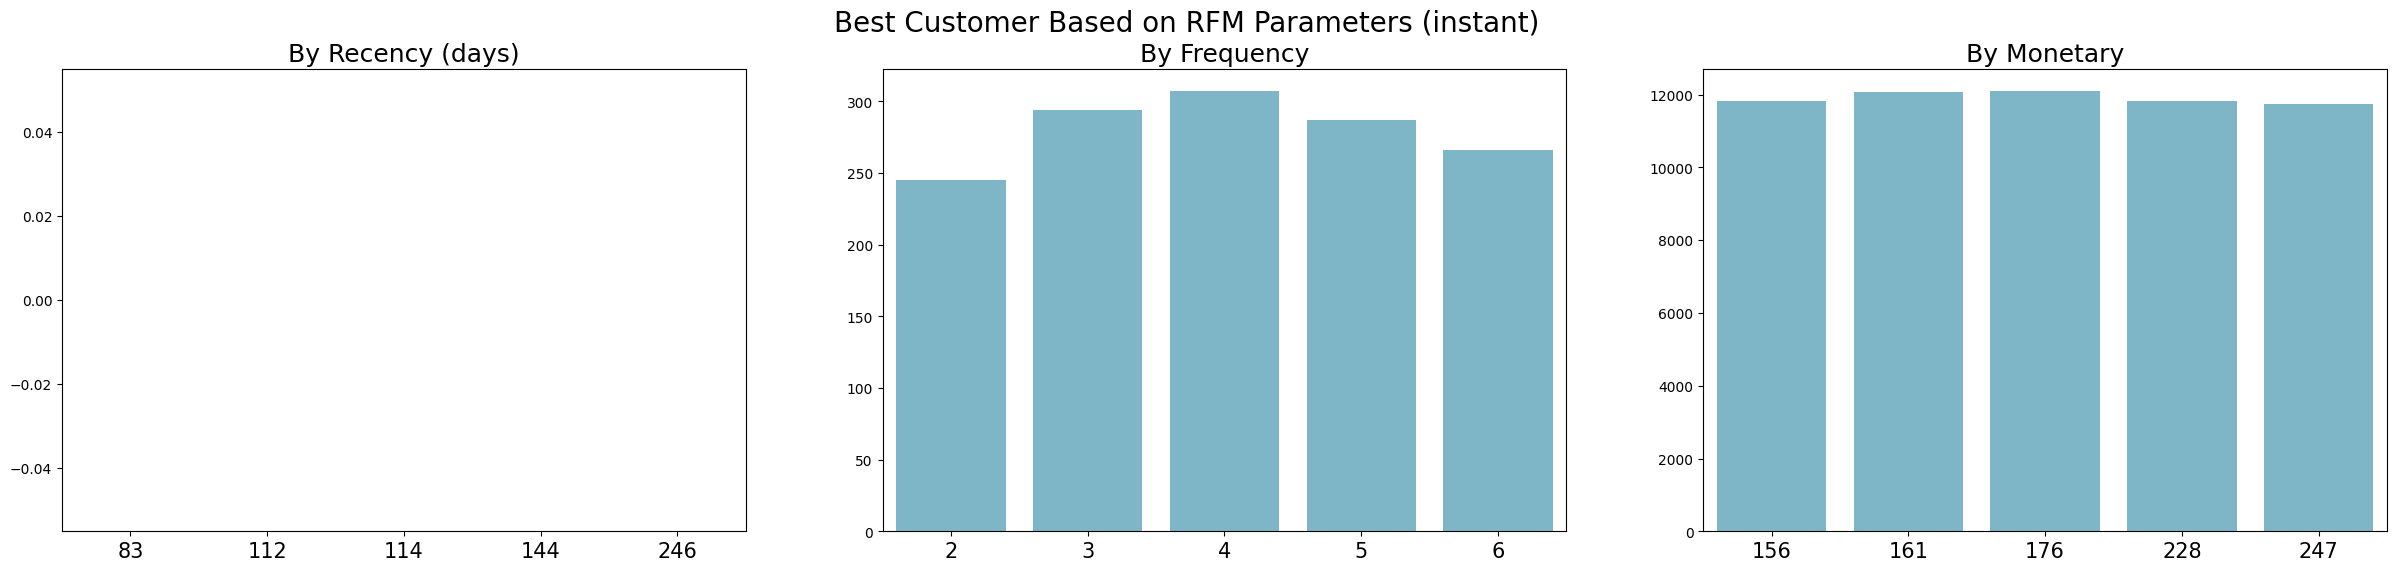

In [38]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4"] * 5

# Bar plot untuk Recency
sns.barplot(
    y="recency",
    x="instant",
    data=rfm_df.sort_values(by="recency", ascending=True).head(5),
    palette=colors,
    ax=ax[0]
)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=15)

# Bar plot untuk Frequency
sns.barplot(
    y="frequency",
    x="instant",
    data=rfm_df.sort_values(by="frequency", ascending=False).head(5),
    palette=colors,
    ax=ax[1]
)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)

# Bar plot untuk Monetary
sns.barplot(
    y="monetary",
    x="instant",
    data=rfm_df.sort_values(by="monetary", ascending=False).head(5),
    palette=colors,
    ax=ax[2]
)
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)

plt.suptitle("Best Customer Based on RFM Parameters (instant)", fontsize=20)
plt.show()

Berdasarkan hasil analisis data yang telah divisualisasikan:

1. **Recency (hari)**:
 * Menampilkan seberapa baru interaksi peminjam, diukur dalam hari sejak peminjaman terakhir. Nilai yang lebih rendah dalam chart menunjukkan bahwa peminjam telah melakukan peminjaman baru-baru ini, yang berkemungkinan lebih besar untuk terlibat kembali.

2. **Frequency**:
 * Menampilkan frekuensi peminjaman yang dilakukan oleh peminjam selama periode tertentu. Batang pada chart menunjukkan jumlah peminjam yang termasuk dalam kategori frekuensi yang berbeda. Batang yang lebih tinggi menunjukkan bahwa lebih banyak peminjam melakukan peminjaman dengan lebih sering, yang menandakan loyalitas dan keterlibatan. Frekuensi yang lebih tinggi biasanya berkorelasi dengan resensi peminjam.

3. **Monetary**:
 * Mewakili nilai moneter yang terkait dengan peminjaman sepeda. Setiap batang menunjukkan total pendapatan yang dihasilkan oleh peminjam dalam segmen moneter tertentu. Tinggi batang yang konsisten menunjukkan bahwa pengeluaran peminjam relatif seragam di seluruh segmen ini. Nilai moneter yang lebih tinggi menunjukkan bahwa peminjam tertentu berkontribusi secara signifikan terhadap total pendapatan. Pemahaman tentang segmen-segmen ini dapat membantu menargetkan upaya pemasaran dengan lebih efektif.

## **Clustering Analysis**

<ipython-input-39-086683d4816f>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  holiday_data = day_df.groupby(by="holiday").agg({"total": "sum"}).reset_index()
<ipython-input-39-086683d4816f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='holiday', y='total', data=holiday_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn

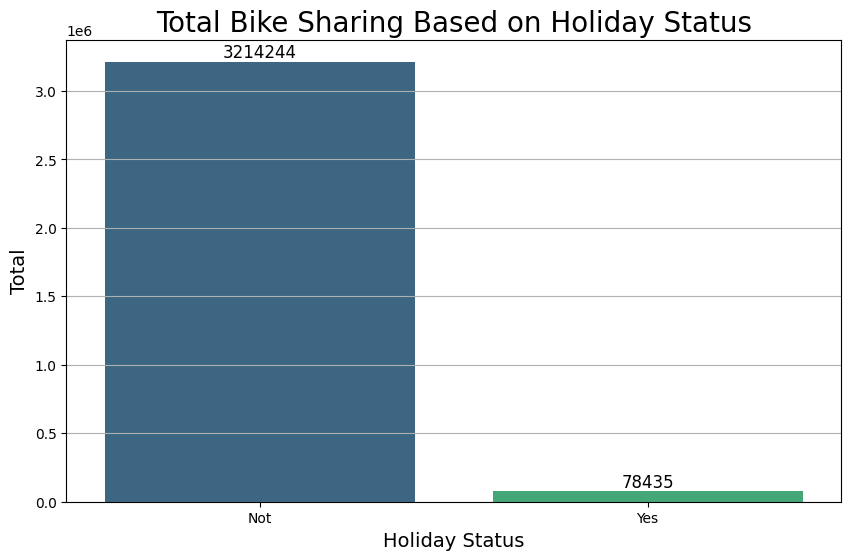

In [39]:
holiday_data = day_df.groupby(by="holiday").agg({"total": "sum"}).reset_index()

plt.figure(figsize=(10, 6))

# Bar chart
sns.barplot(x='holiday', y='total', data=holiday_data, palette='viridis')
plt.title('Total Bike Sharing Based on Holiday Status', fontsize=20)
plt.xlabel('Holiday Status', fontsize=14)
plt.ylabel('Total', fontsize=14)

for index, value in enumerate(holiday_data['total']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y')
plt.show()

Berdasarkan analisis clustering, peminjaman sepeda lebih sering dilakukan saat tidak sedang hari libur (holiday) dengan total 3.214.244.

<ipython-input-40-7ae8b8259c6d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hum_data = day_df.groupby(by="hum_category").agg({"total": "sum"}).reset_index()
<ipython-input-40-7ae8b8259c6d>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='hum_category', y='total', data=hum_data, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seabo

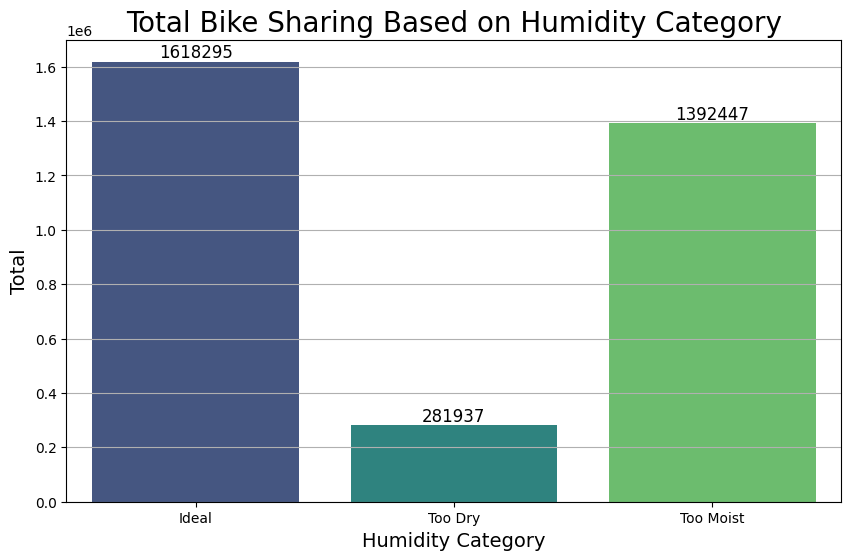

In [40]:
hum_data = day_df.groupby(by="hum_category").agg({"total": "sum"}).reset_index()

plt.figure(figsize=(10, 6))

# Bar chart
sns.barplot(x='hum_category', y='total', data=hum_data, palette='viridis')
plt.title('Total Bike Sharing Based on Humidity Category', fontsize=20)
plt.xlabel('Humidity Category', fontsize=14)
plt.ylabel('Total', fontsize=14)

for index, value in enumerate(hum_data['total']):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y')
plt.show()

Berdasarkan analisis clustering, peminjaman sepeda lebih sering dilakukan saat kelembapan udara berada di tingkat ideal (0,45-0,65) dengan total 1.618.295.

# **CONCLUSION**

Hasil Analisis Bike-Sharing Dataset Berdasarkan Pertanyaan Bisnis:

1.   Pada jam berapa peminjaman sepeda yang paling banyak dan paling sedikit?
  * Berdasarkan hasil analisis, peminjaman sepeda paling banyak dilakukan pada pukul 17:00 dan paling sedikit dilakukan pada pukul 4:00.
2.   Pada bulan apa peminjaman sepeda yang paling banyak dan paling sedikit?
  * Berdasarkan hasil analisis, peminjaman sepeda paling banyak dilakukan pada bulan Agustus dan paling sedikit dilakukan pada bulan Januari.
3.   Berapa banyak orang yang menjadi peminjam registered dibandingkan dengan casual?
  * Berdasarkan hasil analisis, peminjam registered memiliki persentase 81,2% dengan jumlah sebanyak 2.672.662, sedangkan peminjam casual memiliki persentase 18,8% dengan jumlah sebanyak 620.017.
4.   Total peminjaman sepeda lebih banyak pada tahun berapa?
  * Berdasarkan hasil analisis, total peminjaman sepeda lebih banyak terjadi pada tahun 2012.
5.   Bagaimana tren peminjaman sepeda dari tahun 2011 ke tahun 2012?
  * Berdasarkan hasil analisis, tren peminjaman sepeda mengalami peningkatan.
6.   Bagaimana tren peminjaman sepeda setiap bulan?
  * Berdasarkan hasil analisis, tren peminjaman setiap bulan mengalami peningkatan bertahap dari Januari-Juni. Lalu, mengalami penurunan dan peningkatan secara stabil dari Juni-September dan mengalami penurunan bertahap dari September-Desember.
7.   Berapa persentase orang yang meminjam sepeda saat weekday dan weekend?
  * Berdasarkan hasil analisis, peminjaman pada hari kerja (weekday) memiliki persentase 72%, sedangkan peminjaman pada hari libur (weekend) memiliki persentase 28%.
8.   Pada musim apa peminjaman sepeda paling sedikit?
  * Berdasarkan hasil analisis, peminjaman sepeda paling sedikit terjadi pada musim dingin (winter).

In [41]:
hour_df.to_csv("hour_new.csv", index=False)

In [42]:
day_df.to_csv("day_new.csv", index=False)